Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `SECTION` below:

In [1]:
NAME = "Kazi Abrab Hossain"
ID = "21201496"
SECTION = "03"

---

# CSE330 Lab: Polynomial Interpolation using Lagrange Form
---

### Importing necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### The Lagrange_Polynomial class
General form of an $n$ degree Lagrange polynomial:

\begin{equation}
p_n(x) = \sum_{k=0}^{n} f(x_k)l_k(x) = \sum_{k=0}^{n} y_kl_k(x),\tag{1}
\end{equation}

where
\begin{equation}
l_k(x) = \prod_{j=0, j\neq k}^{n} \frac{x-x_j}{x_k-x_j}. \tag{2}
\end{equation}

Note that the Lagrange method is more efficient than the matrix method because *we do not need to calculate any inverse matrices*.

1. **The constructor `__init__(self, data_x, data_y)` is written for you.**

     * Here, we check whether the input vectors (numpy arrays) are equal or not.
     * We store `data_x` and `data_y`
     * We calculate and store the degree of the polynomial.
$$\$$

2. **The `_repr__(self)` function has been written for you.**

    * This is similar to the `toString()` method in Java. This returns a formatted string of the object whenever the object is printed.
$$\$$

3. **You have to implement the `l(self, k, x)` function.**
    * This function would take `k` and `x` as inputs and calculate the Lagrange basis using the Equation $(2)$.
$$\$$

4. **You have to implement the `__call__(self, x_arr)` function.**
    * This function makes an object of a class callable.
    * The function calculates the lagrange polynomial from a set of given nodes. `self.data_x` and `self.data_y` contains the coordinates of the given nodes of the original function. Using Equation $(1)$, you have to use `self.data_x`, `self.data_y`, and the `l(k, x_k, x)` function to find the interpolated output of the polynomial for all elements of `x_arr`.
`x_arr` is a numpy array containing points through which we want to plot our polynomial.

In [3]:
class Lagrange_Polynomial:
    def __init__(self, data_x, data_y):
        '''
        First we need to check whether the input vectors (numpy arrays) are equal
        or not.
        assert (condition), "msg"
        this command checks if the condition is true or false. If true, the code
        runs normally. But if false, then the code returns an error message "msg"
        and stops execution
        '''
        assert len(data_x) == len(data_y), "length of data_x and data_y must be equal"

        '''
        Lagrange polynomials do not use coefficeints a_i, rather the nodes
        (x_i, y_i). Hence, we just need to store these inside the object
        '''

        self.data_x = data_x
        self.data_y = data_y

        self.degree = len(data_x) - 1
        # we assume that the inputs are numpy array, so we can perform
        # element wise operations

    def __repr__(self):
        # method for string representation
        # you don't need to worry about the following code if you don't understand
        strL = f"LagrangePolynomial of order {self.degree}\n"
        strL += "p(x) = "
        for i in range(len(self.data_y)):
            if self.data_y[i] == 0:
                continue
            elif self.data_y[i] >= 0:
                strL += f"+ {self.data_y[i]}*l_{i}(x) "
            else:
                strL += f"- {-self.data_y[i]}*l_{i}(x) "

        return strL

    def l(self, k, x):


        l_k = 1.0 # Initialization

        # --------------------------------------------
        # YOUR CODE HERE
        x_k = self.data_x[k]

        for j in range(self.degree + 1):
          if j == k:
             continue
          else:
              l_k *= (x-data_x[j]) / (x_k-data_x[j])
         #raise NotImplementedError()

        return l_k


    def __call__(self, x_arr):

        # initialize with zero
        p_x_arr  = np.zeros(len(x_arr))

        # --------------------------------------------
        # YOUR CODE HERE
        n = len(x_arr)
        for i in range(n):
            x = x_arr[i]
            for k in range(self.degree + 1):
                  p_x_arr[i] += self.data_y[k] * self.l(k, x)
        #raise NotImplementedError()

        return p_x_arr

### Calling the LagrangePolynomial object and plotting the polynomial.



*Note that in the plot the given nodes will be marked in red.*

In [4]:
import numpy as np

LagrangePolynomial of order 6
p(x) = + 4.0*l_0(x) + 1.193*l_1(x) + 6.156*l_2(x) + 2.0*l_3(x) + 1.803*l_4(x) + 2.558*l_5(x) 


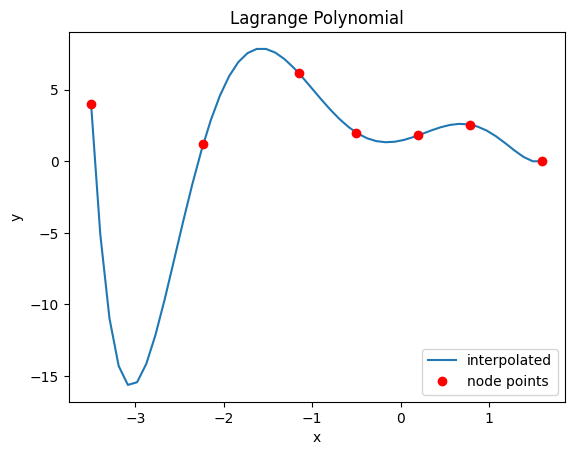

In [5]:
data_x = np.array([-3.5, -2.231, -1.152, -0.5, 0.198, 0.785, 1.6])
data_y = np.array([4.0, 1.193, 6.156, 2.0, 1.803, 2.558, 0.0])

p = Lagrange_Polynomial(data_x, data_y)
print(p)

#generating 50 points from -2.55 to 1.189 in order to create a smooth line
x_arr = np.linspace(-3.5, 1.6, 50)
p_x_arr = p(x_arr)

# plot to see if your implementation is correct
#google the functions to understand what each parameters mean, if not apparent
plt.plot(x_arr, p_x_arr)
plt.plot(data_x, data_y, 'ro')
plt.legend(['interpolated', 'node points'], loc = 'lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial')

plt.show()



###Problem related Lagrange interpolation

> Suppose, you have a function f(x) = 3x and three nodes (2, 3), (4, 6), (6, 9). Using Lagrange basis, print out the value of the interpolating polynomial at x = -2.5. Also, display the actual interpolation error at x = -2.5.

Hint: Interpolation error = | f(-2.5) - p(-2.5) | where p is the interpolating polynomial.

`You have to solve this problem using Lagrange_Polynomial class`

In [6]:
#your code here
#your code here
data_x = np.array([2, 4, 6])
data_y = np.array([8,16,24])
p = Lagrange_Polynomial(data_x, data_y)
print(p)
print(f"The interpolating polynomial at x = -1.5 is {p([-2.5])}")
print(f"Interpolation error {abs((4*-2.5)-p([-2.5])[0])}")

LagrangePolynomial of order 2
p(x) = + 8*l_0(x) + 16*l_1(x) + 24*l_2(x) 
The interpolating polynomial at x = -1.5 is [-10.]
Interpolation error 0.0
